# **Behavioral Cloning** 

## Writeup Template

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Behavioral Cloning Project**

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/placeholder.png "Model Visualization"
[image2]: ./examples/placeholder.png "Grayscaling"
[image3]: ./examples/placeholder_small.png "Recovery Image"
[image4]: ./examples/placeholder_small.png "Recovery Image"
[image5]: ./examples/placeholder_small.png "Recovery Image"
[image6]: ./examples/placeholder_small.png "Normal Image"
[image7]: ./examples/placeholder_small.png "Flipped Image"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/432/view) individually and describe how I addressed each point in my implementation.  

---
### Files Submitted & Code Quality

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:
* model.py containing the script to create and train the model
* drive.py for driving the car in autonomous mode
* model.h5 containing a trained convolution neural network 
* writeup.ipynb summarizing the results and
* runl.mp4 containing the video of the car driving in autonomous mode

The code can be found online in Github at the following [link](https://github.com/parrucad/Behavioral-Cloning)

#### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing 
```sh
python drive.py model.h5
```

#### 3. Submission code is usable and readable

The model.py file contains the code for training and saving the convolution neural network. The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.

### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

My model consists of a convolution neural network based on the NVidia architecture explained [here](https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf). The reason why I chose this model is due to its success in previous similar works.

#### 2. Attempts to reduce overfitting in the model

The model was trained and validated on different data sets to ensure that the model was not overfitting (model.py line 97). The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

#### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually (model.py line 96) and an Mean Square Error loss function (model.py line 96).

#### 4. Appropriate training data

Training data was chosen to keep the vehicle driving on the road. I used a combination of center lane driving, recovering from the left and right sides of the road by driving the car on purpose to the corner and recovering out of it, by driving the track clock-wise and anti-clockwise sense, by driving the car on purpose on critical scenarios twice (clockwise and anti-clockwise) e.g. to the bridge section, to the water region, to steep curve regions and to road dirt regions.

For details about how I created the training data, see the next section. 

### Model Architecture and Training Strategy

#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to investigate which models are being currently used from the academia for such problems. I discovered that the NVidia model published in the paper "End to End Learning for Self-Driving Cars" was quite successful about the task of this submission.

In order to gauge how well the model was working, I split my image and steering angle data into a training and validation set with a a ration 80% by 20%. 

The final step was to run the simulator to see how well the car was driving around track one. There were a few spots where the vehicle fell off the track like at the bridge, the water regions and the dirt on the road side. To improve the driving behavior in these cases, I drove the car multiple times on them for both clock-wise and anti-clockwise sense.

At the end of the process, the vehicle is able to drive autonomously around the track without leaving the road.

#### 2. Final Model Architecture

The final model architecture (model.py lines 75-90) consisted of a convolution neural network with the following layers and layer sizes:

* Normalization and cropping layer
* 24 Convolutional layers with kernel (5x5)
* 36 Convolutional layers with kernel (5x5)
* 48 Convolutional layers with kernel (5x5)
* 64 Convolutional layers with kernel (3x3)
* 64 Convolutional layers with kernel (3x3)
* Fully connected layer with 1164 neurons
* Fully connected layer with 100 neurons
* Fully connected layer with 50 neurons
* Fully connected layer with 10 neurons

#### 3. Creation of the Training Set & Training Process

To capture good driving behavior, I first recorded two laps on track one using center lane driving. Here is an example image of center lane driving:


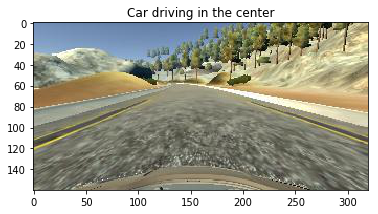

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./Documents/Examples/2018_12_17_07_45_51_347_normal.jpg')
imgplot = plt.imshow(img)
plt.title("Car driving in the center")
plt.show()

I then recorded the vehicle recovering from the left side and right sides of the road back to center so that the vehicle would learn to .... These images show what a recovery looks like starting from ... :
Then I repeated this process on track two in order to get more data points.

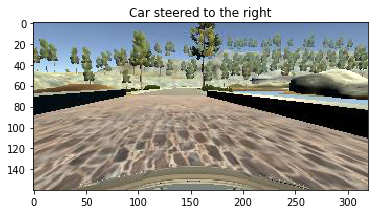

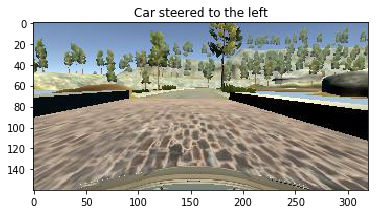

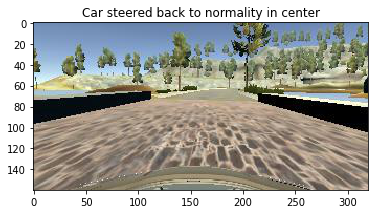

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./Documents/Examples/bridge/center_2018_12_16_23_37_00_292.jpg')
imgplot = plt.imshow(img)
plt.title("Car steered to the right")
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./Documents/Examples/bridge/center_2018_12_16_23_37_00_772.jpg')
imgplot = plt.imshow(img)
plt.title("Car steered to the left")
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./Documents/Examples/bridge/center_2018_12_16_23_37_00_910.jpg')
imgplot = plt.imshow(img)
plt.title("Car steered back to normality in center")
plt.show()

To augment the data sat, I also flipped images and angles thinking that this would remove the bias of the car strongly steering to the left.
For example, here is an image that has then been flipped:

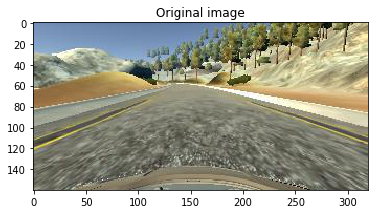

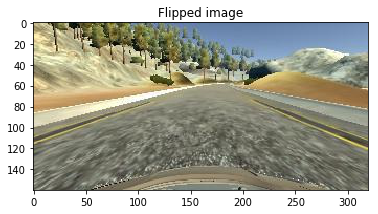

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./Documents/Examples/2018_12_17_07_45_51_347_normal.jpg')
imgplot = plt.imshow(img)
plt.title("Original image")
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./Documents/Examples/2018_12_17_07_45_51_347_normal_flipped.jpg')
imgplot = plt.imshow(img)
plt.title("Flipped image")
plt.show()

Additionally, I also included the images from all the three cameras and consequently adapted also the steering angle (model.py lines 18-37).

After the collection process, I had ca 28000x3 number of data points. I then preprocessed this data by cropping the image by removing the cars hood section and the sky part (model.py lines 43-49).

I finally randomly shuffled the data set and put 20% of the data into a validation set. 

I used this training data for training the model. The validation set helped determine if the model was over or under fitting. The ideal number of epochs was 4 as evidenced by an increase of the validation error at the fifth epoch. I used an adam optimizer so that manually training the learning rate wasn't necessary.